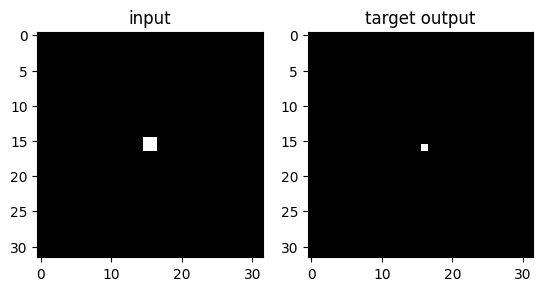

In [2]:
import torch
import matplotlib.pyplot as plt

H , W = 32,32
inp = torch.zeros(H,W) #input image
inp[15:17,15:17] = 1  # to make a small square near the centre

y = torch.zeros(H,W)
y[16,16] = 1

plt.subplot(1,2,1)
plt.title("input")
plt.imshow(inp,cmap='gray')
plt.subplot(1,2,2)
plt.title("target output")
plt.imshow(y,cmap='gray')
plt.show()

In [5]:
filter = torch.randn(7,7,requires_grad=True)

def my_convolve(i,j,inp,filter):
  sum = 0
  pad = 3 # for 7x7 filter
  for p in range(7):
    for q in range(7):
      a = i + p - pad
      b = j + q - pad

      if 0 <= a < inp.shape[0] and 0 <= b < inp.shape[1]:
          sum = sum + inp[a, b] * filter[p, q]
  return sum

def my_single_layer_single_neuron_nn(inp,filter):
  H,W = inp.shape
  output = torch.zeros(H,W)
  for i in range(H):
    for j in range(W):
      output[i,j] = my_convolve(i,j,inp,filter)
  return output

In [7]:
alpha = 1e-2

for epoch in range (10):
  output = my_single_layer_single_neuron_nn(inp,filter)
  loss = torch.sum((output - y)**2)

  filter.grad = None
  loss.backward()
  with torch.no_grad():
    filter -= alpha*filter.grad
  print(f"Epoch {epoch+1},Loss = {loss.item():.4f}")

Epoch 1,Loss = 105.7214
Epoch 2,Loss = 84.5962
Epoch 3,Loss = 68.8568
Epoch 4,Loss = 56.8150
Epoch 5,Loss = 47.4070
Epoch 6,Loss = 39.9348
Epoch 7,Loss = 33.9228
Epoch 8,Loss = 29.0348
Epoch 9,Loss = 25.0263
Epoch 10,Loss = 21.7144


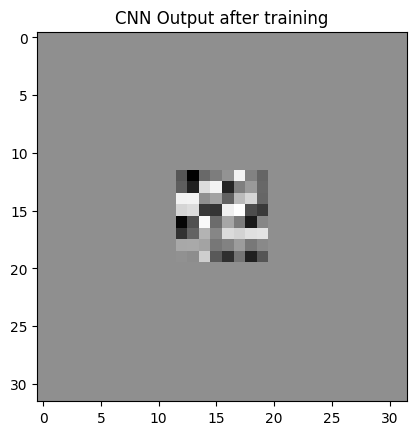

In [11]:
with torch.no_grad():
   out = my_single_layer_single_neuron_nn(inp,filter)

plt.imshow(out,cmap='gray')
plt.title("CNN Output after training")
plt.show()